### Keşfedici Veri Analizi

#### Diabetes

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Python Veri Analizi/Proje 1 - Diabetes/diabetes.csv")

Bu proje ile şu sorunları cevaplayabiliriz:  

1- Hamilelik,glikoz,kan basıncı, deri kalınlığı gibi faktörler diyabetik olup olmama karşı nasıl bir etkisi vardır ?  
2- Diyabetik olmaya en çok etkili olan değişken hangisidir?  
3- Kilo ile deri kalınlığı arasında nasıl bir ilişki vardır ?   
4-Genetik bilgi ile diyabetik arasındaki ilişki nedir ?  



In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
data.Outcome = data.Outcome.astype(str)

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

Text(0, 0.5, 'Frekans')

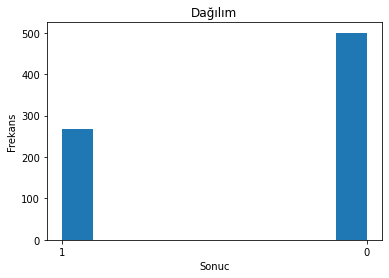

In [10]:
# histogram
plt.hist(data["Outcome"])
plt.title("Dağılım")
plt.xlabel("Sonuc")
plt.ylabel("Frekans")

In [11]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [13]:
data.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

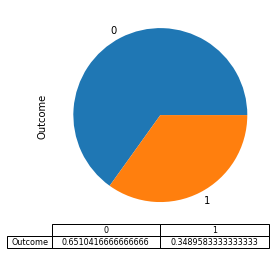

In [14]:
data.Outcome.value_counts(normalize=True).plot(kind = 'pie', table=True)

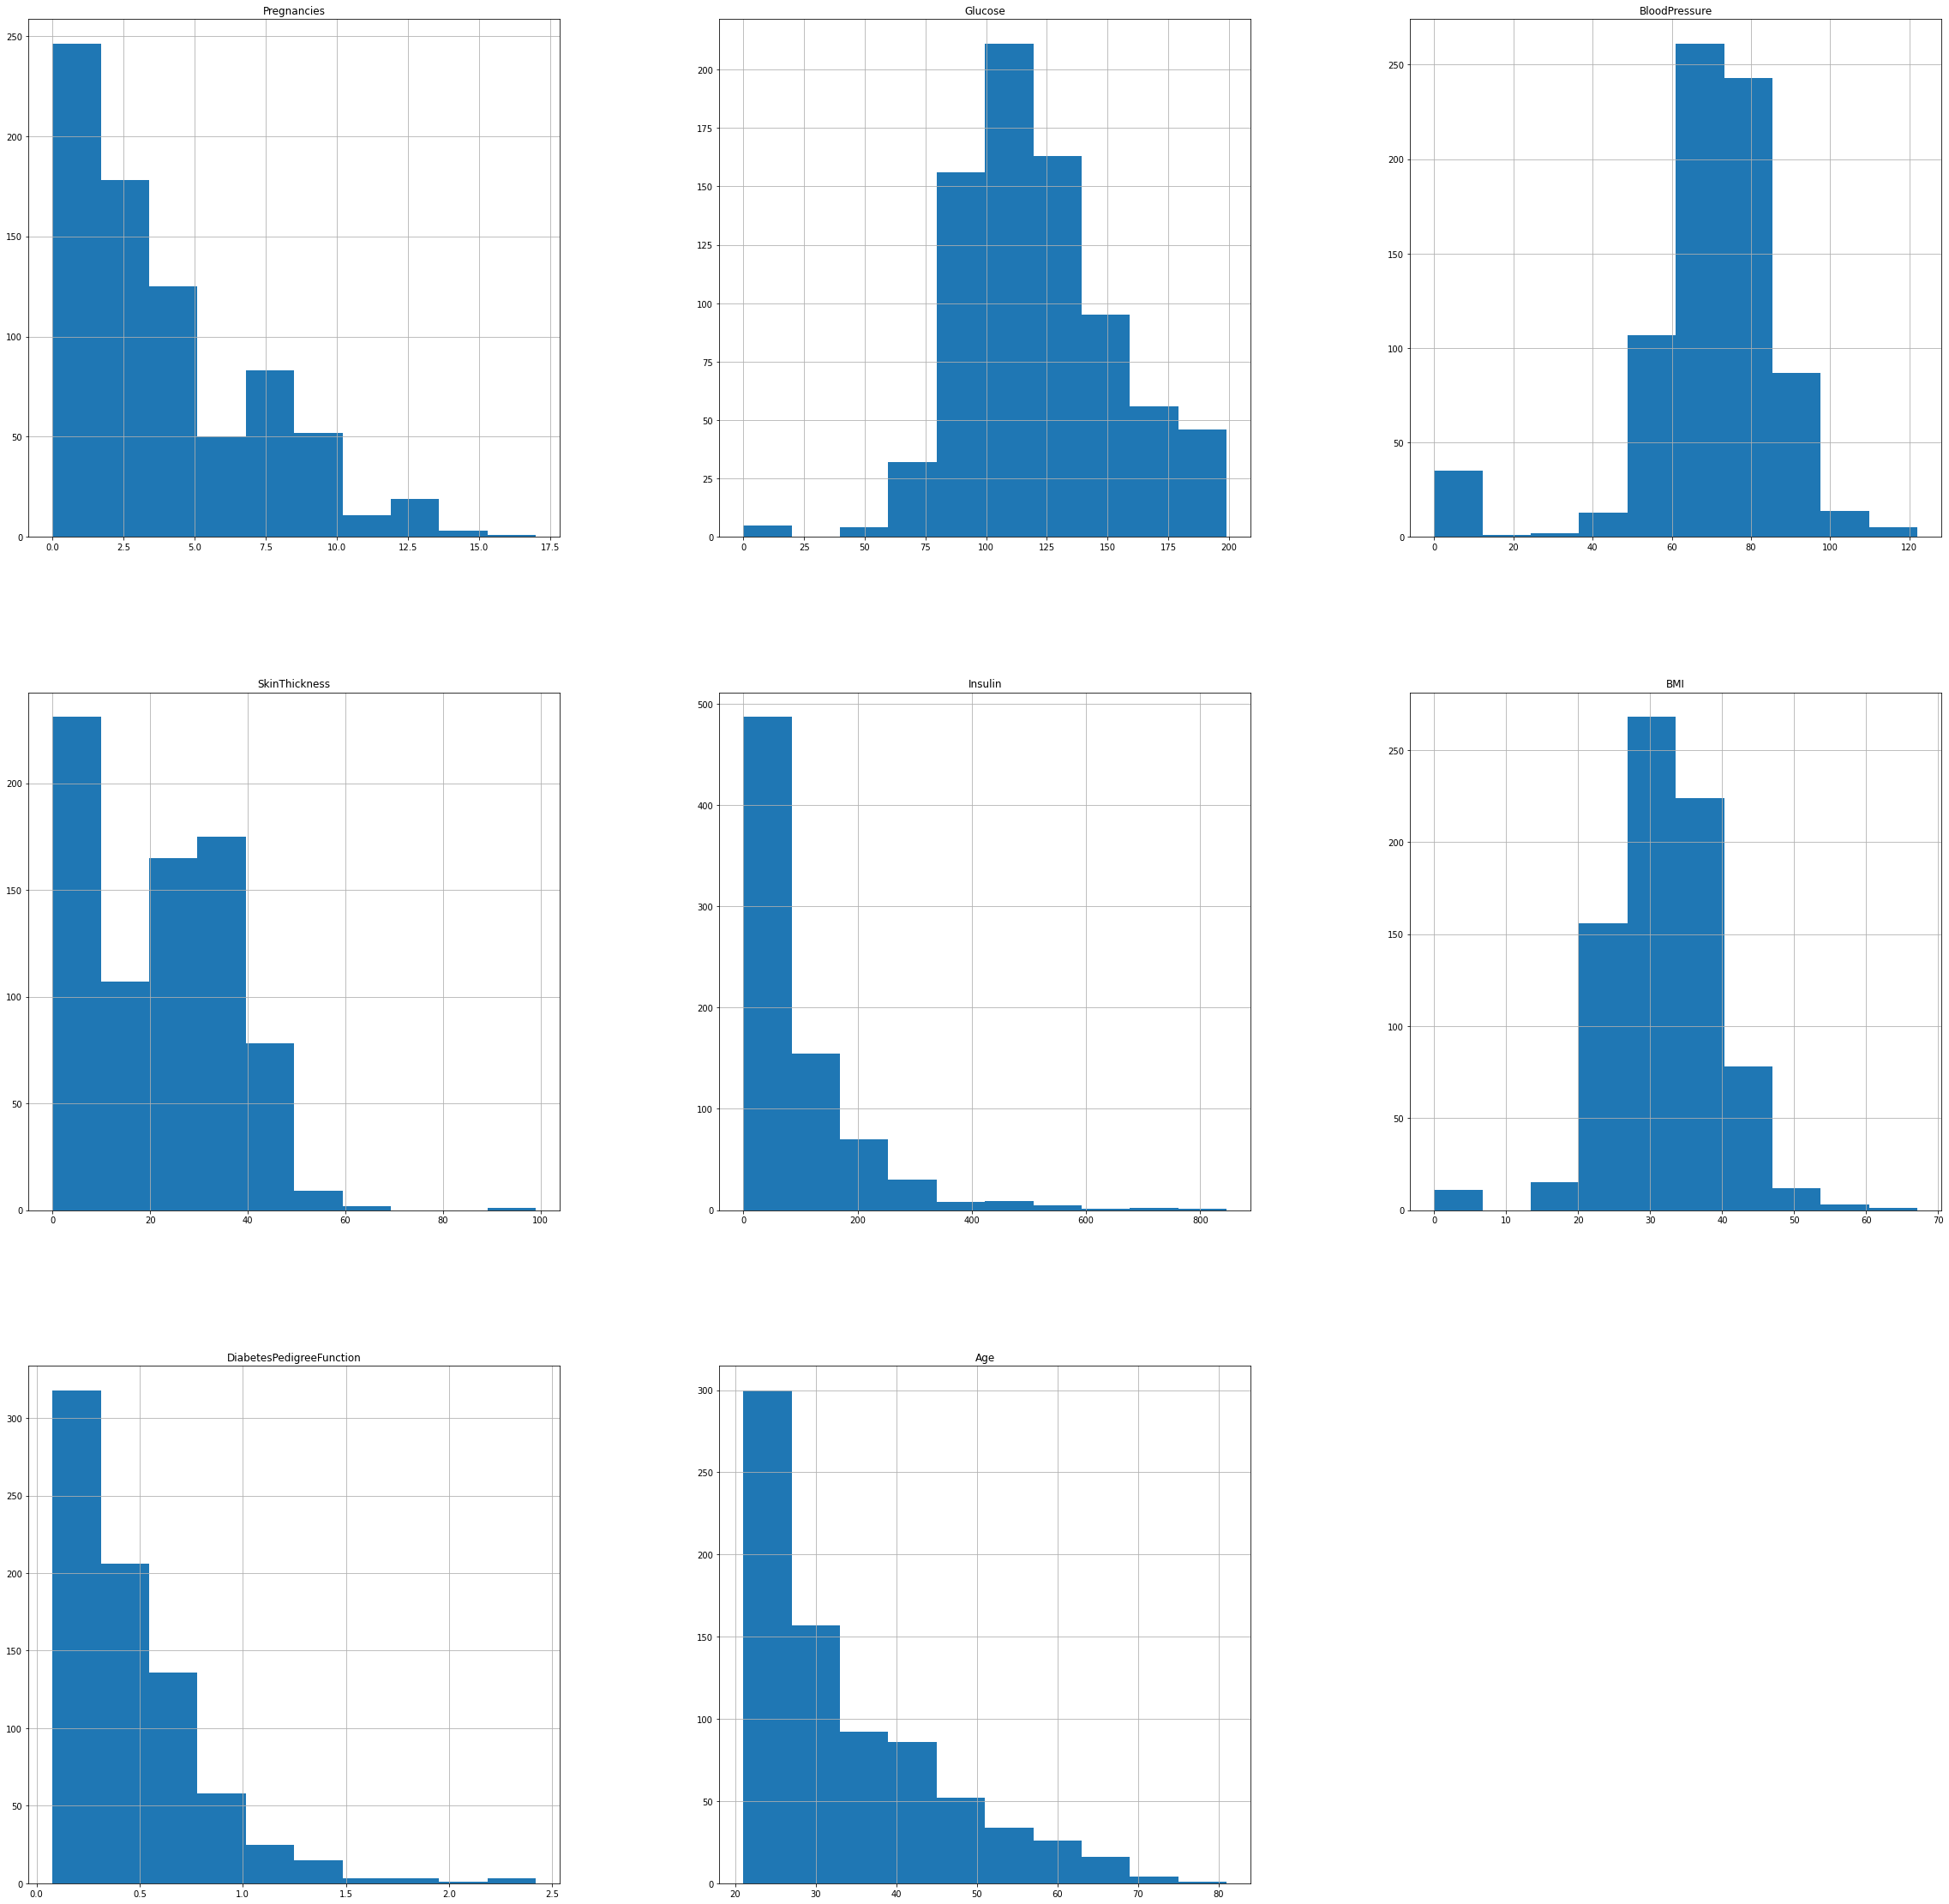

In [15]:
data.hist(figsize=(40,40));

In [16]:
data[data.SkinThickness > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


# 2. ders Proje 1 devamı

In [17]:
eksik_bilgiler = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [18]:
data[eksik_bilgiler] = np.where(data[eksik_bilgiler] == 0, np.nan, data[eksik_bilgiler])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


In [20]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Yukarıda (data.isnull) eksik değerleri tespit ettik ve onları doldurucaz.

Boştaki verileri doldururken ortalama değeri değil medyanı kullanıcaz çünkü ortalama alınırken arasında çok fark olan değerler olduğundan medyan kullanıcaz

In [21]:
data_yari_temiz = data.fillna(data.median)

In [22]:
data_yari_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [23]:
 data['age_bins'] = pd.cut(x=data['Age'], bins=[20,30,40,50,60,70,80,90])

In [24]:
data['age_bins'] = data['age_bins'].astype(str)

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [26]:
data_temiz = data.fillna(data.groupby(['Pregnancies', 'Outcome', 'age_bins']).transform('median'))

In [27]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [28]:
data.groupby(['Outcome', 'age_bins', 'Pregnancies']).count()

Glucose  BloodPressure  SkinThickness  Insulin  \
Outcome age_bins Pregnancies                                                   
0       (20, 30] 0                 61             58             47       35   
                 1                 93             96             87       68   
                 2                 76             72             62       49   
                 3                 37             35             29       23   
                 4                 28             28             19       14   
...                               ...            ...            ...      ...   
1       (50, 60] 12                 1              1              1        1   
        (60, 70] 0                  1              1              0        0   
                 2                  2              2              1        0   
                 4                  3              3              1        0   
                 6                  1              1              0        0   

                              BMI  DiabetesPedigreeFunction  Age  
Outcome age_bins Pregnancies                                      
0       (20, 30] 0             58                        61   61  
                 1             96                        96   96  
                 2             74                        76   76  
                 3             36                        37   37  
                 4             28                        28   28  
...                           ...                       ...  ...  
1       (50, 60] 12             1                         1    1  
        (60, 70] 0              1                         1    1  
                 2              2                         2    2  
                 4              3                         3    3  
                 6              1                         1    1  

[117 rows x 7 columns]

In [29]:
data[(data.Outcome == '0') & (data.Pregnancies == 7) & (data.age_bins == "(20, 30]")]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0,"(20, 30]"


In [30]:
data_temiz = data_temiz.fillna(data_temiz.groupby(['Outcome', 'age_bins']).transform('median'))

In [31]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [32]:
data_temiz = data_temiz.fillna(data_temiz.groupby(['Outcome']).transform('median'))

In [33]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [34]:
data_temiz.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.652995,30.461996,44.000,99.75000,117.0000,140.62500,199.00
BloodPressure,768.0,72.390625,12.175103,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.260417,9.630455,7.000,23.00000,29.0000,35.00000,99.00
Insulin,768.0,149.170573,98.480044,14.000,88.00000,122.0000,176.00000,846.00
BMI,768.0,32.441406,6.879257,18.200,27.50000,32.2500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [35]:
data_corr = data_temiz.copy()

In [36]:
data['Outcome'] = data_corr['Outcome'].astype(int)

In [37]:
data_corr.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
age_bins                     object
dtype: object

In [38]:
data_corr.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.130204,0.212879,0.095501,0.085940,0.022387,-0.033523,0.544341
Glucose,0.130204,1.000000,0.226114,0.212726,0.489035,0.235571,0.138743,0.269018
BloodPressure,0.212879,0.226114,1.000000,0.193823,0.106811,0.288496,0.000507,0.332321
SkinThickness,0.095501,0.212726,0.193823,1.000000,0.194374,0.506986,0.106386,0.178004
Insulin,0.085940,0.489035,0.106811,0.194374,1.000000,0.197611,0.124860,0.249208
BMI,0.022387,0.235571,0.288496,0.506986,0.197611,1.000000,0.154958,0.027081
DiabetesPedigreeFunction,-0.033523,0.138743,0.000507,0.106386,0.124860,0.154958,1.000000,0.033561
Age,0.544341,0.269018,0.332321,0.178004,0.249208,0.027081,0.033561,1.000000


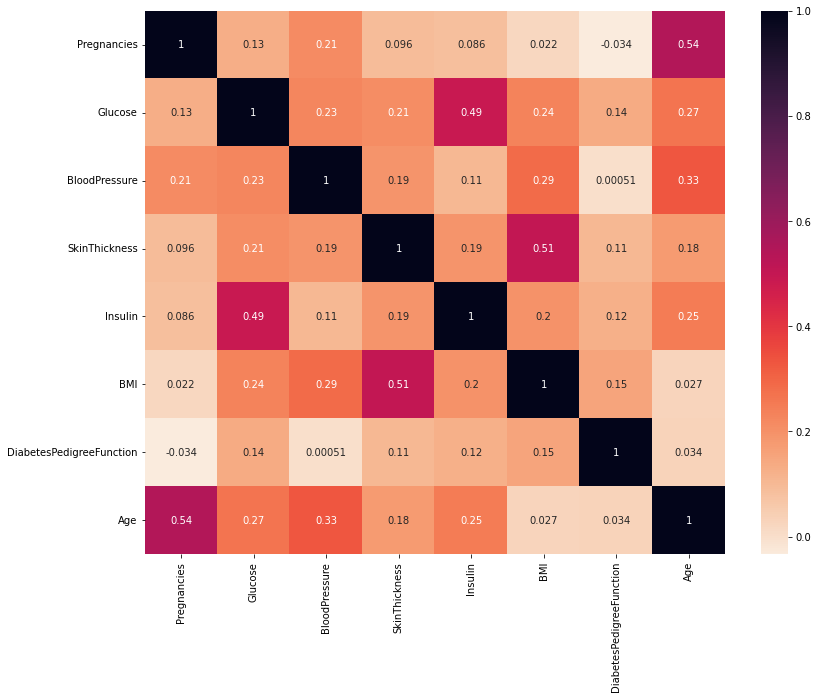

In [39]:
plt.figure(figsize=(13,10))
cmap = sns.color_palette('rocket_r', as_cmap=True)
sns.heatmap(data_corr.corr(), cmap=cmap, annot=True)

In [40]:
data_temiz = data_temiz.reset_index()

In [41]:
data_temiz

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
763,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
764,764,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
765,765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
766,766,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


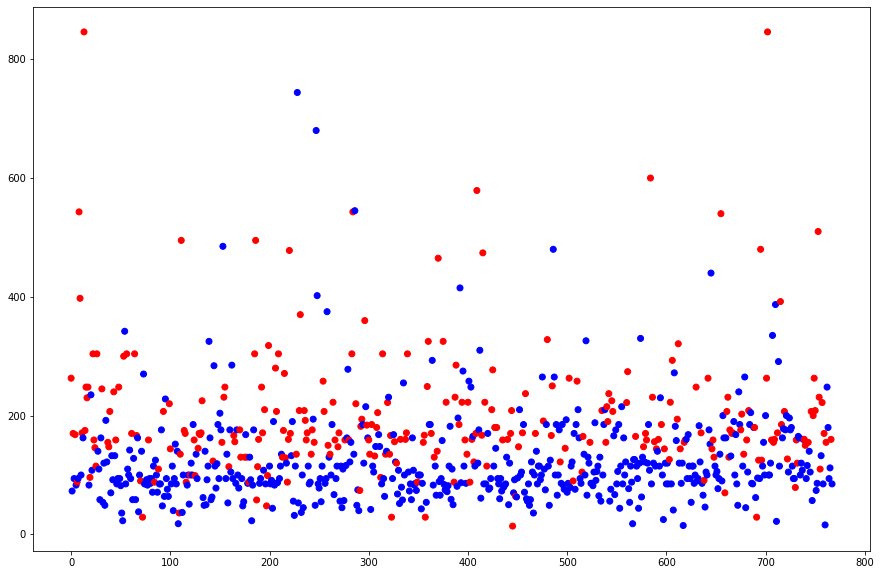

In [42]:
colors = {"0":'blue', "1":'red'}
plt.figure(figsize = (15, 10))
plt.scatter(data_temiz.index, data_temiz.Insulin, c=data_temiz['Outcome'].map(colors))

In [43]:
data_temiz.reset_index(drop=False, inplace=True)

In [44]:
data_temiz

,level_0,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,0,0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,2,2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
763,763,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
764,764,764,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
765,765,765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
766,766,766,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [45]:
px.scatter(data_temiz, x='index', y='Insulin', color='Outcome', color_discrete_sequence=['red', 'blue'])

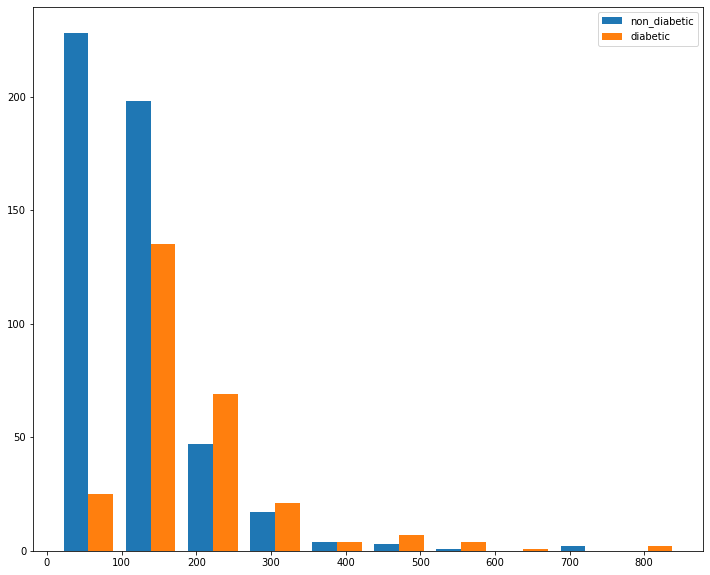

In [46]:
plt.figure(figsize=(12,10))
data_diabetic = data_temiz.loc[data_temiz.Outcome == '1'];
data_non_diabetic = data_temiz.loc[data_temiz.Outcome == '0'];

labels=['non_diabetic', 'diabetic'];
plt.hist([data_non_diabetic['Insulin'], data_diabetic['Insulin']], label=labels);
plt.legend()